# Random Forest Cross-validation

# importing libraries

In [21]:
import os
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pickle
import random
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import seaborn as sns
import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from pprint import pprint
from sklearn.metrics import classification_report
from skimage.feature import greycomatrix, greycoprops

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from numpy import mean
from numpy import std

### Dataset and labels

In [22]:
dire="D:/Individual_Trees_photos/exatctcrop"
categories= ['European beech', 'European silver fir', 'Norway spruce', 'Sessile oak']

data =[]
SIZE = 200
images =[]
label1 =[]
for category in categories:
    path = os.path.join(dire, category)
    label = categories.index(category)
    
    
    for img in os.listdir(path):
        imgpath = os.path.join(path,img)
        tree_img = cv2.imread(imgpath,0)
        try:
            tree_img = cv2.resize(tree_img, (SIZE, SIZE)) #Resize images
            #tree_img = cv2.resize(tree_img,(50,50))
            image = np.array(tree_img).flatten()
        
            #data.append([image, label])
            images.append(tree_img)
            label1.append(label)
        except Exception as e:
            pass
images=np.array(images)  

In [23]:
print(label)

3


# Feature and label

In [24]:
# FEATURE EXTRACTOR function
# input shape is (n, x, y, c) - number of images, x, y, and channels
def feature_extractor(dataset):
    image_dataset = pd.DataFrame()
    for image in range(dataset.shape[0]):  #iterate through each file 
        #print(image)
        
        df = pd.DataFrame()  #Temporary data frame to capture information for each loop.
        #Reset dataframe to blank after each loop.
        
        img = dataset[image, :,:]
        
        #Full image
        #GLCM = greycomatrix(img, [1], [0, np.pi/4, np.pi/2, 3*np.pi/4])
        GLCM = greycomatrix(img, [1], [0])       
        GLCM_Energy = greycoprops(GLCM, 'energy')[0]
        df['Energy'] = GLCM_Energy
        GLCM_corr = greycoprops(GLCM, 'correlation')[0]
        df['Corr'] = GLCM_corr       
        GLCM_diss = greycoprops(GLCM, 'dissimilarity')[0]
        df['Diss_sim'] = GLCM_diss       
        GLCM_hom = greycoprops(GLCM, 'homogeneity')[0]
        df['Homogen'] = GLCM_hom       
        GLCM_contr = greycoprops(GLCM, 'contrast')[0]
        df['Contrast'] = GLCM_contr
        
        GLCM2 = greycomatrix(img, [3], [0])       
        GLCM_Energy2 = greycoprops(GLCM2, 'energy')[0]
        df['Energy2'] = GLCM_Energy2
        GLCM_corr2 = greycoprops(GLCM2, 'correlation')[0]
        df['Corr2'] = GLCM_corr2       
        GLCM_diss2 = greycoprops(GLCM2, 'dissimilarity')[0]
        df['Diss_sim2'] = GLCM_diss2       
        GLCM_hom2 = greycoprops(GLCM2, 'homogeneity')[0]
        df['Homogen2'] = GLCM_hom2       
        GLCM_contr2 = greycoprops(GLCM2, 'contrast')[0]
        df['Contrast2'] = GLCM_contr2

        GLCM3 = greycomatrix(img, [5], [0])       
        GLCM_Energy3 = greycoprops(GLCM3, 'energy')[0]
        df['Energy3'] = GLCM_Energy3
        GLCM_corr3 = greycoprops(GLCM3, 'correlation')[0]
        df['Corr3'] = GLCM_corr3       
        GLCM_diss3 = greycoprops(GLCM3, 'dissimilarity')[0]
        df['Diss_sim3'] = GLCM_diss3       
        GLCM_hom3 = greycoprops(GLCM3, 'homogeneity')[0]
        df['Homogen3'] = GLCM_hom3       
        GLCM_contr3 = greycoprops(GLCM3, 'contrast')[0]
        df['Contrast3'] = GLCM_contr3
        
        GLCM4 = greycomatrix(img, [0], [np.pi/4])       
        GLCM_Energy4 = greycoprops(GLCM4, 'energy')[0]
        df['Energy4'] = GLCM_Energy4
        GLCM_corr4 = greycoprops(GLCM4, 'correlation')[0]
        df['Corr4'] = GLCM_corr4       
        GLCM_diss4 = greycoprops(GLCM4, 'dissimilarity')[0]
        df['Diss_sim4'] = GLCM_diss4       
        GLCM_hom4 = greycoprops(GLCM4, 'homogeneity')[0]
        df['Homogen4'] = GLCM_hom4       
        GLCM_contr4 = greycoprops(GLCM4, 'contrast')[0]
        df['Contrast4'] = GLCM_contr4
        
        GLCM5 = greycomatrix(img, [0], [np.pi/2])       
        GLCM_Energy5 = greycoprops(GLCM5, 'energy')[0]
        df['Energy5'] = GLCM_Energy5
        GLCM_corr5 = greycoprops(GLCM5, 'correlation')[0]
        df['Corr5'] = GLCM_corr5       
        GLCM_diss5 = greycoprops(GLCM5, 'dissimilarity')[0]
        df['Diss_sim5'] = GLCM_diss5       
        GLCM_hom5 = greycoprops(GLCM5, 'homogeneity')[0]
        df['Homogen5'] = GLCM_hom5       
        GLCM_contr5 = greycoprops(GLCM5, 'contrast')[0]
        df['Contrast5'] = GLCM_contr5
        
        #Add more filters as needed
        #entropy = shannon_entropy(img)
        #df['Entropy'] = entropy

        
        #Append features from current image to the dataset
        image_dataset = image_dataset.append(df)
        
    return image_dataset

In [25]:
#Extract features from images
image_features = feature_extractor(images)
X_for_ML =image_features


# Train and test data split 

In [26]:
#train test

xtrain, xtest, ytrain, ytest = train_test_split(X_for_ML, label1, test_size =0.25)

## Random Forest Classifier with cross validation

In [27]:
from sklearn.ensemble import RandomForestClassifier
# from sklearn.ensemble import GradientBoostingClassifier
model = RandomForestClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=1)
n_scores = cross_val_score(model, xtrain, ytrain, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.862 (0.059)


In [28]:
model.fit(xtrain, ytrain)

RandomForestClassifier()

In [29]:
predictions = cross_val_predict(model,xtest,ytest)
predictions

array([0, 2, 1, 0, 0, 2, 0, 0, 0, 0, 0, 2, 3, 0, 2, 1, 0, 2, 2, 1, 1, 0,
       2, 3, 2, 1, 2, 3, 0, 2, 3, 1, 3, 2, 0, 3, 3, 3, 3, 0, 0, 1, 3, 2,
       3, 3, 1, 1, 3, 1, 1, 2, 2, 1, 3, 3, 0, 1, 0, 0, 2, 0, 3, 3, 0, 0,
       0, 2, 1, 2, 3, 3, 3, 1, 0, 1, 0, 3, 3, 3, 2, 0, 3, 3, 1, 1, 3, 2,
       3, 3, 2, 3, 0, 0, 2, 0, 1, 0, 1, 2, 0, 1, 3, 2, 0, 3, 0, 0, 0, 1,
       1, 1, 2, 0, 0, 0, 3, 3, 1, 3, 1, 3, 2, 3, 0, 3, 3, 1, 2, 2, 3, 2])

In [30]:
#fold on test data
scores_test = cross_val_score(model,xtest, ytest,  scoring='accuracy', cv=10, n_jobs=-1, error_score='raise')
print('Accuracy: %.3f (%.3f)' % (mean(scores_test), std(scores_test)))

Accuracy: 0.808 (0.120)


In [31]:
from sklearn.metrics import classification_report

print (classification_report(ytest, predictions))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        38
           1       0.78      0.70      0.74        30
           2       0.75      0.68      0.71        31
           3       0.67      0.79      0.72        33

    accuracy                           0.80       132
   macro avg       0.79      0.78      0.79       132
weighted avg       0.80      0.80      0.80       132



In [32]:
# from sklearn.ensemble import RandomForestClassifier
# classifier = RandomForestClassifier(n_estimators = 40)
# classifier.fit(xtrain, ytrain)

# print("Accuracy on training set: {:.3f}".format(classifier.score(xtrain, ytrain)))
# print("Accuracy on test set: {:.3f}".format(classifier.score(xtest, ytest)))

In [33]:
# from sklearn.ensemble import RandomForestClassifier
# classifier = RandomForestClassifier(n_estimators = 40)
# #train model with cv of 5 
# cv_scores = cross_val_score(classifier, xtrain, ytrain, cv=5)
# #print each cv score (accuracy) and average them
# print('Accuracy: %.3f (%.3f)' % (mean(cv_scores), std(cv_scores)))

In [34]:
# cv_scores = cross_val_score(classifier, xtest, ytest)
# #print each cv score (accuracy) and average them
# print('Accuracy: %.3f (%.3f)' % (mean(cv_scores), std(cv_scores)))

In [35]:
# #train model with cv of 5 
# cv_scores = cross_val_score(classifier, xtest, ytest, cv=5)
# #print each cv score (accuracy) and average them
# print('Accuracy: %.3f (%.3f)' % (mean(cv_scores), std(cv_scores)))

In [36]:
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# n_scores = cross_val_score(classifier, xtrain, ytrain, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# # report performance
# print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))


In [37]:
# print("Accuracy on training set: {:.3f}".format(classifier.score(xtrain, ytrain)))
# print("Accuracy on test set: {:.3f}".format(classifier.score(xtest, ytest)))

In [38]:
# from sklearn.metrics import classification_report
# predictions = classifier.predict(xtest)
# print (classification_report(ytest, predictions))

In [39]:
# pprint(classifier.get_params())

<AxesSubplot:>

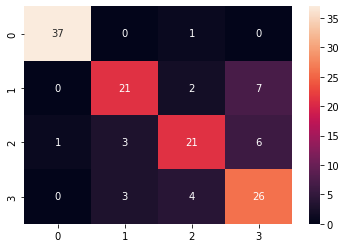

In [40]:
matrix= confusion_matrix(ytest, predictions)

sns.heatmap(matrix,annot = True, fmt = "d")